In [1]:
import pandas as pd

In [2]:
def read_excel(excel_path, tab):
    df = pd.read_excel(excel_path, tab)
    df.index = pd.to_datetime(df['DATETIME'])
    del df['DATETIME']
    return df

def drown_factor(h1, h2, m, flow=0, vortex=False):
    #https://help.autodesk.com/view/IWICMS/2024/ENU/?guid=GUID-66F0B502-4BE9-428A-A2CD-D43047B2093C
    """h1: head (upstream depth if m>0, otherwise h1=us - ds depth
    h2: downstream depth
    m: modular limit


    Args:
        h1 (_type_): _description_
        h2 (_type_): _description_
        m (_type_): _description_
        flow (int, optional): _description_. Defaults to 0.
        vortex (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """
    if m==0: return 1 # m=0, it will not use modular limit
    # swithc h1, h2 if it is reverse flow and not a vortex
    if flow < 0 and (not vortex): h1, h2 = h2, h1
    # in case it will give div by zero error
    if h1 == 0: return 1
    # if it is not drowned
    if h2/h1 <= m: return 1
    f = ((1 - h2 / h1) / (1 - m))**0.5
    # print(f)
    if f < 0.3:
         f = (1 - h2 / h1) / (0.3 * (1 - m))
    return f


In [4]:
excel_path = './data/data.xlsx'

# Gully vs Inlet vs Screw Pump 

Gully and Inlet with head discharge curve are the same.

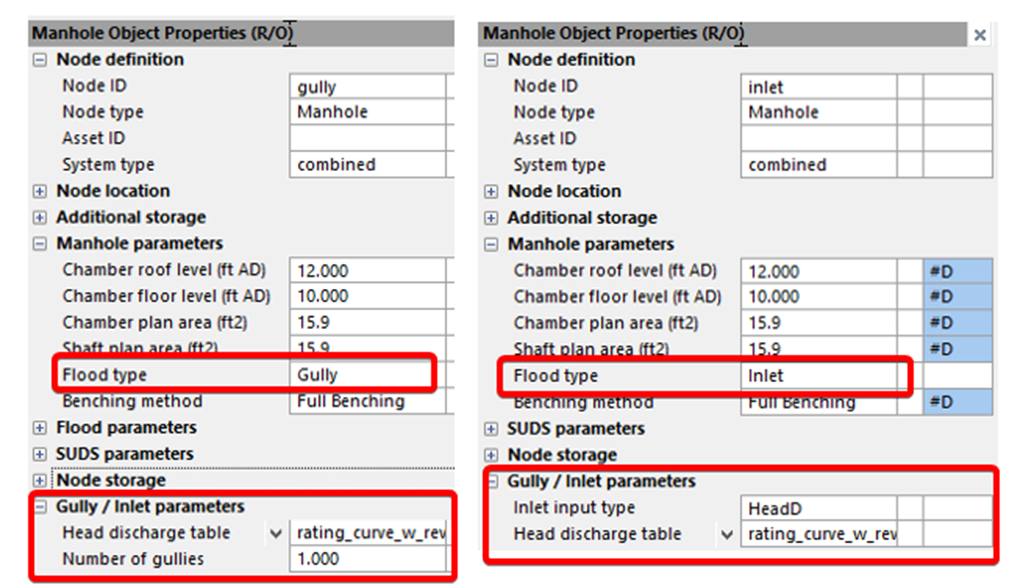




# Free flow vs overflow

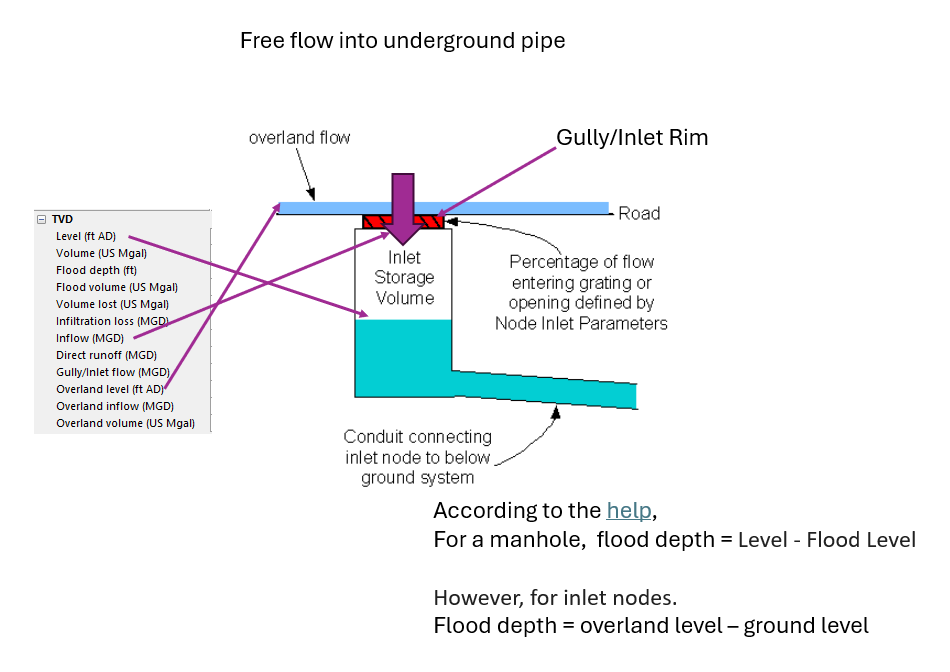


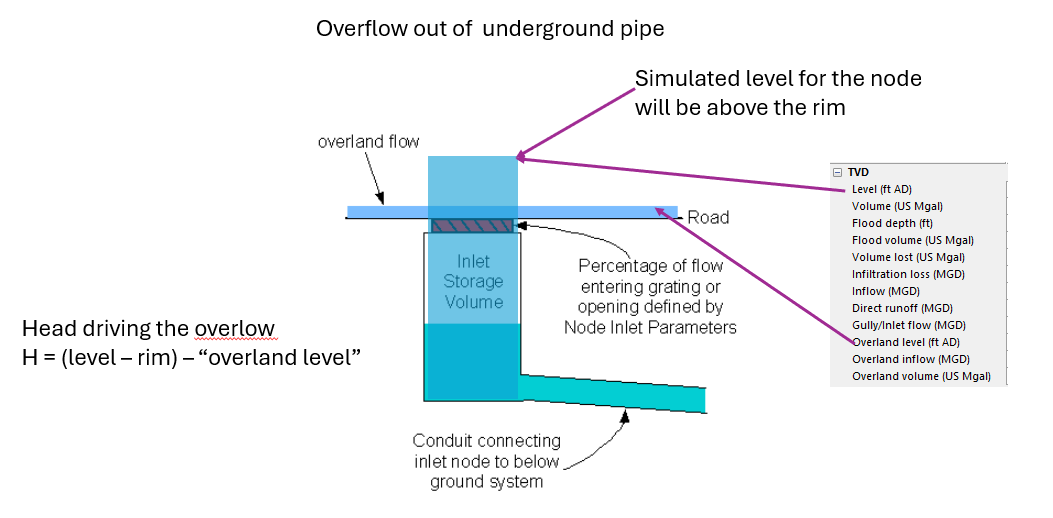

In [42]:
def inlet_head(df, rim, node_depth_fld, road_depth_fld):
    """calculate the head of an inlet
    flow freely into: the same as road_level
    overflow out of the node: node_level - road_level
        rim (float): inlet ground level
    """
    df = df.copy()
    df['head'] = rim - df[node_depth_fld]
    # free fall into the inlet
    df.loc[df['head'] > 0, 'head'] = df.loc[df['head'] > 0, road_depth_fld]
    # head in the node - head in the overland channel
    df.loc[df['head'] < 0, 'head'] = df.loc[df['head'] < 0, road_depth_fld] + df.loc[df['head'] < 0, 'head']
    return df



<Axes: xlabel='Discharge (MGD)'>

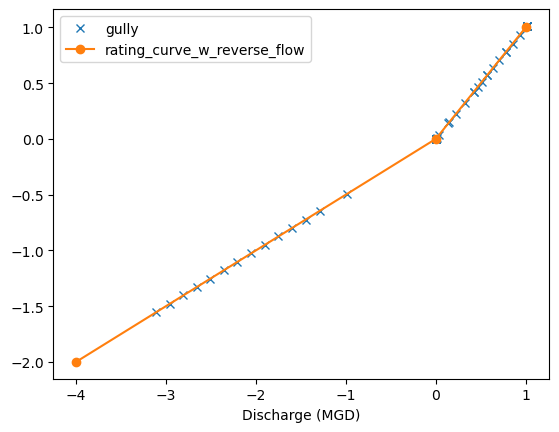

In [ ]:
# gully
rim = 12 #gully rim
rc_name = 'rating_curve_w_reverse_flow'
flow_fld = 'Gully/Inlet flow (MGD)' #gully inlet flow
tab = 'gully'

df = read_excel(excel_path, tab)
df = inlet_head(df, rim, node_depth_fld='Level (ft AD)', road_depth_fld='Flood depth (ft)')
rc = pd.read_excel(excel_path, rc_name)

ax = df.plot(x=flow_fld, y='head', label=f'{tab}', style='x')
rc.plot(x='Discharge (MGD)', y='Head (ft)', style='o-', ax=ax, label=rc_name)


<Axes: xlabel='Discharge (MGD)'>

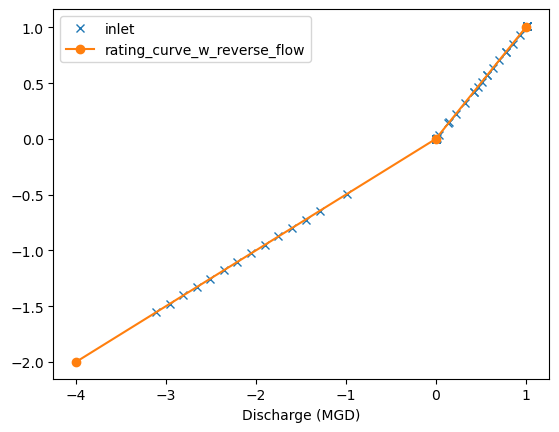

In [44]:
rim = 12 #inlet rim
rc_name = 'rating_curve_w_reverse_flow'
flow_fld = 'Gully/Inlet flow (MGD)'
tab = 'inlet'

df = read_excel(excel_path, tab)
df = inlet_head(df, rim, node_depth_fld='Level (ft AD)', road_depth_fld='Flood depth (ft)')
rc = pd.read_excel(excel_path, rc_name)

ax = df.plot(x=flow_fld, y='head', label=f'{tab}', style='x')
rc.plot(x='Discharge (MGD)', y='Head (ft)', style='o-', ax=ax, label=rc_name)


<Axes: xlabel='Discharge (MGD)'>

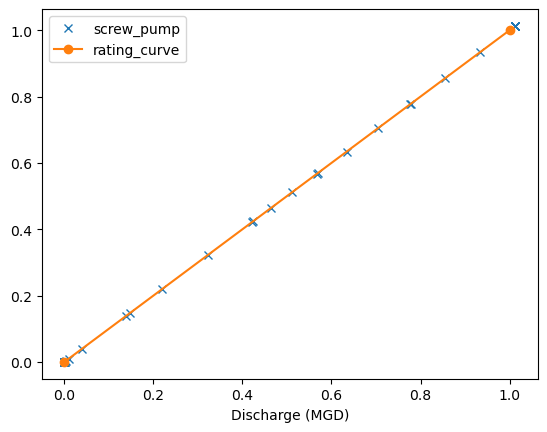

In [ ]:
rc_name = 'rating_curve'
base_level = 12
node_floor = 12
offset = base_level - node_floor
tab = 'screw_pump'

df = read_excel(excel_path, tab)
rc = pd.read_excel(excel_path, rc_name)
df['head'] = df['US depth (ft)']
df['flow'] = df['US flow (MGD)']

ax = df.plot(x='flow', y='head', label=f'{tab}', style='x')
rc.plot(x='Discharge (MGD)', y='Head (ft)', style='o-', ax=ax, label=rc_name)